# <center>Testing News Asymmetry Between Small and Large Companies</center>


### <center>A sentiment analysis study by Robert Grote and Ryan Fairhurst</center>

This is an interactive Python notebook, which requires that the user run the cells within in order to see the results. Run the cells from the top, all the way down the page by clicking on the first cell, then holding down shift or command or control (depending on whether you're on PC or Mac), then hitting enter.

Install the modules that you will need for reading in all of the data by running the following cell.    
Uncomment the following two lines the first time you run this in order to install the necessary modules by deleting the hash symbol.

In [1]:
#For Mac
'''
!pip install pandas-datareader
!pip install yahoo-finance
!pip install matplotlib
'''

'\n!pip install pandas-datareader\n!pip install yahoo-finance\n!pip install matplotlib\n'

Import the following modules:

In [165]:
import yahoo_finance as yfin
import pandas as pd
import pandas_datareader.data as web
import datetime
import csv
import math
import pandas_datareader.data as data
from yahoo_finance import Share
from pandas_datareader.yahoo.quotes import _yahoo_codes
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np

The basic idea is that, as companies grow in size, the relative proportion of bad news grows with respect to the amount of good news. We are interested in testing whether this is true and appears in the data, whether it differs by industry, whether there is a maximum threshold of how much bad news can be experienced by small companies, and how the proportions change by company size. In the following  prototype, we conceptualize using jumps in Google Trends data and jumps in stock price data to detect newsworthy events, and observations which will amount to the idea of linking sentiment to a company, then recording its size and several other key variables that we think will have interesting relationships with company size and sentiment.

In [3]:
#'Jumps' in data--a place for our ideas
"""
Defining a Jump
When an event happens
Positive/Negative Event
Positive/Negative interest
"""
#trends-->prices
#prices-->trends
#volume-->prices


#Jump Program: Percentage change--not dollar change
#Different times (Stamp when, magnitude, duration, direction)
#--make a program that measures relatively, not absolutely (percentages, not dollars)
#Sustained vs transient growth

#Jumps:
#1: Identify Jumps
#2:Categorize comparable categories
##Compare news profiles (trends)
##Compare

#Var Types:
#C-Continuous
#S-Scalar
#B-Binary (Dummy)
#P-Percentage change
#R-Rate of change
#D-Discreet--qualitative
#Z-Z Score
#T-Time

#Create a new dataset of jump observations
###Categories###
#*0: Company Name/Ticker Symbol
#1:S Size of company (Market cap pre- and post-jump)
#*2:B Direction (+/-, good/bad news)
#*3:S Time: Does this relationship between news and jumps change in different market conditions?
#4:B Period (Does the relationship between news and jumps change in different market conditions (recession, recovery))
###Possibly just use S&P 500 or define broad market categories
#*4:P Magnitude (percent change in price from before jump until after jump)
#5:R Average Rate of change (magnitude/time [measured in days])
#6:D Industry (do different industries behave differently)
#7:B Sustainability-do prices return to pre-jump level (separate test)
#8: Accompanying Google Trends pattern
###Increased interest before/after/during
###sustained interest sustained increased interest?
###Magnitude
###Rate of change
#*9:Z News volatility (maybe find a relationship between this and company size)
#10:Z Stock Price Volatility
#10:T Duration: when do prices stabilize?

#Defining jump: like Robot Broker Program, but with variable x time and variable percentage p
#get rid of redundancy and characterize different types of movement

'\nDefining a Jump\nWhen an event happens\nPositive/Negative Event\nPositive/Negative interest\n'

In [2]:
stockHistory=pd.read_csv('WilshireHist.csv')

In [3]:
stockHistory

,Date,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,...,ZN,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ
0,2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-01-02,NaN,NaN,NaN,NaN,2.967206,7.933725,3.250350,25.954398,1.384490,...,NaN,NaN,NaN,5.250,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-01-05,NaN,NaN,NaN,NaN,2.957786,8.036587,3.265805,25.718507,1.442394,...,NaN,NaN,NaN,5.210,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-01-06,NaN,NaN,NaN,NaN,3.004885,8.036587,3.312162,26.177538,1.437189,...,NaN,NaN,NaN,5.409,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-01-07,NaN,NaN,NaN,NaN,2.863589,7.929433,3.294995,26.999970,1.469720,...,NaN,NaN,NaN,5.700,NaN,NaN,NaN,NaN,NaN,NaN
5,2004-01-08,NaN,NaN,NaN,NaN,2.901268,8.208036,3.298428,26.285920,1.519816,...,NaN,NaN,NaN,5.400,NaN,NaN,NaN,NaN,NaN,NaN
6,2004-01-09,NaN,NaN,NaN,NaN,2.882428,8.229465,3.370541,26.254043,1.496395,...,NaN,NaN,NaN,5.210,NaN,NaN,NaN,NaN,NaN,NaN
7,2004-01-12,NaN,NaN,NaN,NaN,2.929527,8.400914,3.348219,26.566441,1.543889,...,NaN,NaN,NaN,5.460,NaN,NaN,NaN,NaN,NaN,NaN
8,2004-01-13,NaN,NaN,NaN,NaN,2.920107,8.465209,3.348219,26.713074,1.569262,...,NaN,NaN,NaN,5.400,NaN,NaN,NaN,NaN,NaN,NaN
9,2004-01-14,NaN,NaN,NaN,NaN,2.920107,8.572364,3.504475,26.840585,1.574467,...,NaN,NaN,NaN,5.250,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
Dates=stockHistory['Date']
Dates

0       2004-01-01
1       2004-01-02
2       2004-01-05
3       2004-01-06
4       2004-01-07
5       2004-01-08
6       2004-01-09
7       2004-01-12
8       2004-01-13
9       2004-01-14
10      2004-01-15
11      2004-01-16
12      2004-01-19
13      2004-01-20
14      2004-01-21
15      2004-01-22
16      2004-01-23
17      2004-01-26
18      2004-01-27
19      2004-01-28
20      2004-01-29
21      2004-01-30
22      2004-02-02
23      2004-02-03
24      2004-02-04
25      2004-02-05
26      2004-02-06
27      2004-02-09
28      2004-02-10
29      2004-02-11
           ...    
3362    2016-11-21
3363    2016-11-22
3364    2016-11-23
3365    2016-11-24
3366    2016-11-25
3367    2016-11-28
3368    2016-11-29
3369    2016-11-30
3370    2016-12-01
3371    2016-12-02
3372    2016-12-05
3373    2016-12-06
3374    2016-12-07
3375    2016-12-08
3376    2016-12-09
3377    2016-12-12
3378    2016-12-13
3379    2016-12-14
3380    2016-12-15
3381    2016-12-16
3382    2016-12-19
3383    2016

In [5]:
del stockHistory["Date"]

In [6]:
pctjumps=stockHistory.pct_change()

In [7]:
def jumpgetter2(df, lookback=1, ythresh=.2):
    pctchanges=df.pct_change(periods=lookback)
    return pctchanges

In [8]:
pctjumps=jumpgetter2(stockHistory)
pctjumps

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZN,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,-0.003175,0.012965,0.004755,-0.009089,0.041823,NaN,...,NaN,NaN,NaN,-0.007619,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.015924,0.000000,0.014195,0.017848,-0.003609,NaN,...,NaN,NaN,NaN,0.038196,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,-0.047022,-0.013333,-0.005183,0.031417,0.022635,NaN,...,NaN,NaN,NaN,0.053799,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,0.013158,0.035135,0.001042,-0.026446,0.034085,NaN,...,NaN,NaN,NaN,-0.052632,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,-0.006494,0.002611,0.021863,-0.001213,-0.015410,NaN,...,NaN,NaN,NaN,-0.035185,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,0.016340,0.020834,-0.006623,0.011899,0.031739,NaN,...,NaN,NaN,NaN,0.047985,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,-0.003216,0.007653,0.000000,0.005519,0.016434,NaN,...,NaN,NaN,NaN,-0.010989,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,0.000000,0.012658,0.046668,0.004773,0.003317,NaN,...,NaN,NaN,NaN,-0.027778,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
pctjumps['Date']=Dates
pctjumps

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-02
2,NaN,NaN,NaN,NaN,-0.003175,0.012965,0.004755,-0.009089,0.041823,NaN,...,NaN,NaN,-0.007619,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-05
3,NaN,NaN,NaN,NaN,0.015924,0.000000,0.014195,0.017848,-0.003609,NaN,...,NaN,NaN,0.038196,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-06
4,NaN,NaN,NaN,NaN,-0.047022,-0.013333,-0.005183,0.031417,0.022635,NaN,...,NaN,NaN,0.053799,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-07
5,NaN,NaN,NaN,NaN,0.013158,0.035135,0.001042,-0.026446,0.034085,NaN,...,NaN,NaN,-0.052632,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-08
6,NaN,NaN,NaN,NaN,-0.006494,0.002611,0.021863,-0.001213,-0.015410,NaN,...,NaN,NaN,-0.035185,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-09
7,NaN,NaN,NaN,NaN,0.016340,0.020834,-0.006623,0.011899,0.031739,NaN,...,NaN,NaN,0.047985,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-12
8,NaN,NaN,NaN,NaN,-0.003216,0.007653,0.000000,0.005519,0.016434,NaN,...,NaN,NaN,-0.010989,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-13
9,NaN,NaN,NaN,NaN,0.000000,0.012658,0.046668,0.004773,0.003317,NaN,...,NaN,NaN,-0.027778,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-14


In [98]:
Dates

0       2004-01-01
1       2004-01-02
2       2004-01-05
3       2004-01-06
4       2004-01-07
5       2004-01-08
6       2004-01-09
7       2004-01-12
8       2004-01-13
9       2004-01-14
10      2004-01-15
11      2004-01-16
12      2004-01-19
13      2004-01-20
14      2004-01-21
15      2004-01-22
16      2004-01-23
17      2004-01-26
18      2004-01-27
19      2004-01-28
20      2004-01-29
21      2004-01-30
22      2004-02-02
23      2004-02-03
24      2004-02-04
25      2004-02-05
26      2004-02-06
27      2004-02-09
28      2004-02-10
29      2004-02-11
           ...    
3362    2016-11-21
3363    2016-11-22
3364    2016-11-23
3365    2016-11-24
3366    2016-11-25
3367    2016-11-28
3368    2016-11-29
3369    2016-11-30
3370    2016-12-01
3371    2016-12-02
3372    2016-12-05
3373    2016-12-06
3374    2016-12-07
3375    2016-12-08
3376    2016-12-09
3377    2016-12-12
3378    2016-12-13
3379    2016-12-14
3380    2016-12-15
3381    2016-12-16
3382    2016-12-19
3383    2016

In [10]:
stockHistory

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZN,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,2.967206,7.933725,3.250350,25.954398,1.384490,NaN,...,NaN,NaN,NaN,5.250,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,2.957786,8.036587,3.265805,25.718507,1.442394,NaN,...,NaN,NaN,NaN,5.210,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3.004885,8.036587,3.312162,26.177538,1.437189,NaN,...,NaN,NaN,NaN,5.409,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,2.863589,7.929433,3.294995,26.999970,1.469720,NaN,...,NaN,NaN,NaN,5.700,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,2.901268,8.208036,3.298428,26.285920,1.519816,NaN,...,NaN,NaN,NaN,5.400,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,2.882428,8.229465,3.370541,26.254043,1.496395,NaN,...,NaN,NaN,NaN,5.210,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,2.929527,8.400914,3.348219,26.566441,1.543889,NaN,...,NaN,NaN,NaN,5.460,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,2.920107,8.465209,3.348219,26.713074,1.569262,NaN,...,NaN,NaN,NaN,5.400,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,2.920107,8.572364,3.504475,26.840585,1.574467,NaN,...,NaN,NaN,NaN,5.250,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
def jumpgetter(df, lookback=1, ythresh=.2): #make ythresh a ratio like .1 for a ten percent jump
    pctchanges=df.pct_change(periods=lookback)
    tfdf=pctchanges>ythresh
    return tfdf #pctchanges.max()

In [22]:
'''
Not this:
    tfdf=pd.DataFrame()
    for col in range(len(pctchanges.columns)):
        if ythresh>0:
            jumpyorn=df[pctchanges.columns[col]]>ythresh
            jumpyorn.rename(df.columns[col])
        if ythresh<0:
            jumpyorn=df[pctchanges.columns[col]]<ythresh
            jumpyorn.rename(df.columns[col])
        tfdf[df.columns[col]]=jumpyorn
    jumpsofthresh=pd.DataFrame(tfdf.values*pctchanges.values)
'''

'\nNot this:\n    tfdf=pd.DataFrame()\n    for col in range(len(pctchanges.columns)):\n        if ythresh>0:\n            jumpyorn=df[pctchanges.columns[col]]>ythresh\n            jumpyorn.rename(df.columns[col])\n        if ythresh<0:\n            jumpyorn=df[pctchanges.columns[col]]<ythresh\n            jumpyorn.rename(df.columns[col])\n        tfdf[df.columns[col]]=jumpyorn\n    jumpsofthresh=pd.DataFrame(tfdf.values*pctchanges.values)\n'

In [23]:
truefalse=jumpgetter(stockHistory)
truefalse['Dates']=Dates

In [24]:
truefalse

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ,Dates
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-01
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-02
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-05
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-06
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-07
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-08
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-09
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-12
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-13
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2004-01-14


In [25]:
type(truefalse)
indexedtf=truefalse.set_index('Dates')

In [100]:
pctjumpsdated=pctjumps.set_index(Dates)

In [101]:
pctjumpsdated

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ,Date
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-02
2004-01-05,NaN,NaN,NaN,NaN,-0.003175,0.012965,0.004755,-0.009089,0.041823,NaN,...,NaN,NaN,-0.007619,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-05
2004-01-06,NaN,NaN,NaN,NaN,0.015924,0.000000,0.014195,0.017848,-0.003609,NaN,...,NaN,NaN,0.038196,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-06
2004-01-07,NaN,NaN,NaN,NaN,-0.047022,-0.013333,-0.005183,0.031417,0.022635,NaN,...,NaN,NaN,0.053799,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-07
2004-01-08,NaN,NaN,NaN,NaN,0.013158,0.035135,0.001042,-0.026446,0.034085,NaN,...,NaN,NaN,-0.052632,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-08
2004-01-09,NaN,NaN,NaN,NaN,-0.006494,0.002611,0.021863,-0.001213,-0.015410,NaN,...,NaN,NaN,-0.035185,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-09
2004-01-12,NaN,NaN,NaN,NaN,0.016340,0.020834,-0.006623,0.011899,0.031739,NaN,...,NaN,NaN,0.047985,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-12
2004-01-13,NaN,NaN,NaN,NaN,-0.003216,0.007653,0.000000,0.005519,0.016434,NaN,...,NaN,NaN,-0.010989,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-13


In [102]:
del pctjumpsdated['Date']

In [103]:
pctjumpsdated

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZN,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,NaN,NaN,NaN,NaN,-0.003175,0.012965,0.004755,-0.009089,0.041823,NaN,...,NaN,NaN,NaN,-0.007619,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-06,NaN,NaN,NaN,NaN,0.015924,0.000000,0.014195,0.017848,-0.003609,NaN,...,NaN,NaN,NaN,0.038196,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-07,NaN,NaN,NaN,NaN,-0.047022,-0.013333,-0.005183,0.031417,0.022635,NaN,...,NaN,NaN,NaN,0.053799,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-08,NaN,NaN,NaN,NaN,0.013158,0.035135,0.001042,-0.026446,0.034085,NaN,...,NaN,NaN,NaN,-0.052632,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-09,NaN,NaN,NaN,NaN,-0.006494,0.002611,0.021863,-0.001213,-0.015410,NaN,...,NaN,NaN,NaN,-0.035185,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-12,NaN,NaN,NaN,NaN,0.016340,0.020834,-0.006623,0.011899,0.031739,NaN,...,NaN,NaN,NaN,0.047985,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-13,NaN,NaN,NaN,NaN,-0.003216,0.007653,0.000000,0.005519,0.016434,NaN,...,NaN,NaN,NaN,-0.010989,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
indexedtf

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZN,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ
Dates,,,,,,,,,,,,,,,,,,,,,
2004-01-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-06,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-08,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-12,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-13,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
type(indexedtf.ix)

pandas.core.indexing._IXIndexer

In [105]:
result = pd.melt(indexedtf.reset_index(), id_vars=['Dates'])
mask = result['value'] == True
result = result.loc[mask, ['Dates', 'variable']]
result.columns = ['date', 'ticker']
#print result
#print result[1]
#result[''] = df.index
print result.ticker
#print result[1]

result['%change']=pctjumpsdated.lookup(result.date, result.ticker)



#result["%change"] = pctjumps.lookup(result.index, result[1])
#result
#create a third column for the percent jump. iloc? from pctJumps DF. sort on this column

4747        AACC
8702         AAI
9532         AAI
9792         AAI
9793         AAI
10056        AAI
10057        AAI
13615       AAME
14689       AAME
14821       AAME
14840       AAME
14844       AAME
14850       AAME
14851       AAME
14854       AAME
14861       AAME
14871       AAME
14879       AAME
14894       AAME
14898       AAME
14928       AAME
14931       AAME
14940       AAME
14964       AAME
14971       AAME
14996       AAME
15023       AAME
15028       AAME
15031       AAME
15077       AAME
            ... 
13903060     ZLC
13907986      ZN
13908032      ZN
13908112      ZN
13908542      ZN
13908611      ZN
13908631      ZN
13908743      ZN
13909217      ZN
13909577      ZN
13909795      ZN
13909815      ZN
13910270      ZN
13917510    ZOLT
13917627    ZOLT
13917831    ZOLT
13918623    ZOLT
13918653    ZOLT
13918655    ZOLT
13919227    ZOLT
13919440    ZOLT
13919487    ZOLT
13935582    ZUMZ
13936402    ZUMZ
13938998      ZZ
13939005      ZZ
13939081      ZZ
13939090      

In [118]:
result

,date,ticker,%change
4747,2009-03-12,AACC,0.239709
8702,2011-05-10,AAI,inf
9532,2014-07-15,AAI,2.000000
9792,2015-07-14,AAI,1.333333
9793,2015-07-15,AAI,0.857143
10056,2016-07-18,AAI,1.000000
10057,2016-07-19,AAI,0.923077
13615,2004-03-08,AAME,0.208054
14689,2008-04-18,AAME,0.203488
14821,2008-10-21,AAME,0.247312


In [119]:
sort=result.sort_values(by='%change',ascending=False) #sort on % change

In [196]:
sortondate=result.sort_values(by='date',ascending=False)

In [198]:
sortondate.to_csv('datesortover20.csv')

In [120]:
sort

,date,ticker,%change
5192004,2012-08-08,GAP,inf
2124716,2009-01-28,CAFI,inf
8702,2011-05-10,AAI,inf
10967638,2008-12-29,SBX,inf
11076238,2009-03-17,SEH,inf
5192047,2012-10-08,GAP,inf
6395051,2008-05-02,IIG,2.622727e+07
6395083,2008-06-17,IIG,5.468749e+06
3883389,2015-04-10,DRL,3.932243e+06
2550242,2014-12-04,CHP,3.225557e+06


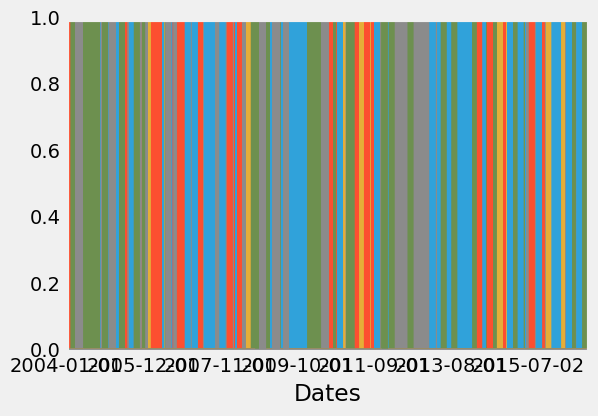

In [123]:
indexedtf.plot()
plt.legend().remove()
plt.show()

In [49]:
type((result.iloc[0][0]).dt.date)

AttributeError: 'str' object has no attribute 'dt'

In [53]:
result.iloc[0][1]

'AACC'

In [55]:
#Use index and column string to get 
print result.ix[1]

KeyError: 1L

In [73]:
#print result.ix[1,1]
#print pctjumps.loc[10][100]
#jumps=[]
#for i in range(len(result.values)):
    #print i
    #jumps.append(pctjumps.loc[i][result.loc[i][1]])
#jumps

AttributeError: 'DataFrame' object has no attribute 'get_loc'

In [61]:
jumpFilter=pd.DataFrame()
#jumpFilter['ticker']=[]
#jumpFilter['percentjumpy']=[]
#jumpFilter['posneg']=[]
#jumpFilter['startdate']=[]
jumpFilter

""


In [56]:
pctchanges['Date']=stockHistory['Date']

In [57]:
pctchanges

,AA,AACC,AAI,AAII,AAME,AAN,AAON,AAP,AAPL,AATI,...,ZNT,ZOLL,ZOLT,ZOOM,ZQK,ZRAN,ZTHO,ZUMZ,ZZ,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-02
2,NaN,NaN,NaN,NaN,-0.003175,0.012965,0.004755,-0.009089,0.041823,NaN,...,NaN,NaN,-0.007619,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-05
3,NaN,NaN,NaN,NaN,0.015924,0.000000,0.014195,0.017848,-0.003609,NaN,...,NaN,NaN,0.038196,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-06
4,NaN,NaN,NaN,NaN,-0.047022,-0.013333,-0.005183,0.031417,0.022635,NaN,...,NaN,NaN,0.053799,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-07
5,NaN,NaN,NaN,NaN,0.013158,0.035135,0.001042,-0.026446,0.034085,NaN,...,NaN,NaN,-0.052632,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-08
6,NaN,NaN,NaN,NaN,-0.006494,0.002611,0.021863,-0.001213,-0.015410,NaN,...,NaN,NaN,-0.035185,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-09
7,NaN,NaN,NaN,NaN,0.016340,0.020834,-0.006623,0.011899,0.031739,NaN,...,NaN,NaN,0.047985,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-12
8,NaN,NaN,NaN,NaN,-0.003216,0.007653,0.000000,0.005519,0.016434,NaN,...,NaN,NaN,-0.010989,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-13
9,NaN,NaN,NaN,NaN,0.000000,0.012658,0.046668,0.004773,0.003317,NaN,...,NaN,NaN,-0.027778,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-14


In [46]:
pctchanges=stockHistory.pct_change()

In [52]:
pctchanges.to_csv('percentchanges.csv')

In [51]:
pctchanges.max()

AA         0.087879
AACC       0.239709
AAI             inf
AAII            NaN
AAME       0.459015
AAN        0.215384
AAON       0.177245
AAP        0.165576
AAPL       0.139050
AATI            NaN
AAWW       0.270615
AB         0.238019
ABAT            NaN
ABAX       0.233625
ABBC            NaN
ABC        0.102207
ABCB       0.311110
ABCO       0.209974
ABCW       0.062910
ABD             NaN
ABDS            NaN
ABFS            NaN
ABG        0.319149
ABH.Z           NaN
ABII            NaN
ABIO       2.101887
ABK      578.146041
ABL       67.727522
ABM        0.237489
ABMC       1.000000
            ...    
YORW       0.119885
YRCW       0.909091
YSI             NaN
YUM        0.114710
ZANE       5.816720
ZBB             NaN
ZBRA       0.143109
ZEP             NaN
ZEUS       0.252140
ZGEN            NaN
ZHNE       0.633929
ZIGO       0.452575
ZILG            NaN
ZINC            NaN
ZION       0.275568
ZIOP       0.633028
ZIPR       1.218102
ZIXI       0.319672
ZLC        0.480427


ValueError: Image size of 537x128832 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 537x128832 pixels is too large. It must be less than 2^16 in each direction.

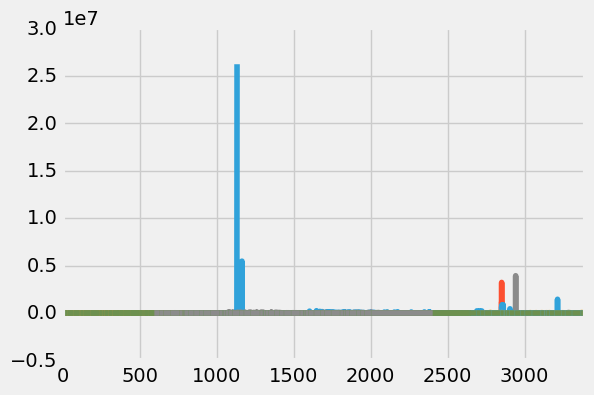

In [47]:
pctchanges.plot()
plt.legend().remove()
plt.show()

In [39]:
del stockHistory['Date']

In [23]:
print stockHistory.iloc[0,0]

2004-01-01


In [24]:
type(stockHistory.values[1][0])

str

In [28]:
stockHistory.values[1:5]

array([['2004-01-02', nan, nan, ..., nan, nan, nan],
       ['2004-01-05', nan, nan, ..., nan, nan, nan],
       ['2004-01-06', nan, nan, ..., nan, nan, nan],
       ['2004-01-07', nan, nan, ..., nan, nan, nan]], dtype=object)

In [30]:
stockHistory[1:].pct_change()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [11]:
def jumpFilter(df, y=.1,x=1):
    lastPrice=1000 #something really high so that we do not have to call the first thing a jump
    listOfJumps=[] #ticker, date, jump threshold passed, lookahead period, pos/neg, percentJump, avgdailyrateofchange, counter
    y=.5 #threshold
    x=1 #lookahead period
    for i in range(1,len(df.columns)): #go over the columns. skip the first one because it is a set of dates; change 3 to len(df.columns) for implementation
        counter=0
        for j in range(len(df.values[:])): #go down and check for each row; get rid of the [1:10] to be comprehensive
            if (j+x)<len(df.values): #execute the following code until the final date minus the lookahead
                if type(df.values[j][i])!=str:
                    if math.isnan(float(df.values[j][i]))==False:
                        if df.values[j][i]!=0:
                            currentPrice=df.values[j][i]
                            futurePrice=df.values[j+x][i]
                            if futurePrice>currentPrice:
                                posneg=1
                            elif futurePrice<currentPrice:
                                posneg=0
                            percentJump=abs((currentPrice-futurePrice)/currentPrice)
                            if (currentPrice-futurePrice)/currentPrice>=y:
                                counter+=1
                                avgDailyRateChange=percentJump/(x+counter-1)
                            elif (currentPrice-futurePrice)/currentPrice<y and counter>=1:
                                listOfJumps.append([df.columns[i],df.values[j][0], y, x, posneg, percentJump, avgDailyRateChange, counter])
                                counter=0
    return listOfJumps

In [88]:
jumpFilter(stockHistory) #columns=['ticker','date','ythresh','lookahead','pos1/neg0','percentjump','avgdailyrateofchange','counter']

[['AACC',
  '2004-02-26',
  0.03,
  1,
  1,
  0.012784880489160669,
  0.03383458646616555,
  1],
 ['AACC',
  '2004-03-12',
  0.03,
  1,
  1,
  0.00673400673400679,
  0.03675675675675674,
  1],
 ['AACC',
  '2004-04-14',
  0.03,
  1,
  0,
  0.025773195876288662,
  0.04901960784313726,
  1],
 ['AACC', '2004-06-21', 0.03, 1, 0, 0.0, 0.034852546916890007, 1],
 ['AACC',
  '2004-06-28',
  0.03,
  1,
  1,
  0.044738500315059805,
  0.022275737507525595,
  2],
 ['AACC',
  '2004-07-14',
  0.03,
  1,
  1,
  0.003634161114475997,
  0.042898550724637594,
  1],
 ['AACC',
  '2004-07-21',
  0.03,
  1,
  1,
  0.030303030303030304,
  0.03339191564147629,
  1],
 ['AACC',
  '2004-09-08',
  0.03,
  1,
  1,
  0.0023242300987797297,
  0.03908431044109432,
  1]]

In [12]:
ourdata=pd.DataFrame(jumpFilter(stockHistory), columns=['ticker','date','ythresh','lookahead','pos1/neg0','percentjump','avgdailyrateofchange','counter'])

KeyboardInterrupt: 

In [32]:
ourdata

NameError: name 'ourdata' is not defined

In [33]:
bonk=float('NaN')
bonk
math.isnan(bonk)
type(bonk)

float

In [17]:
#jumplist=[]
#for rowIndex in range(len(stockHistory.values)): #delete the 3 for enlarged application
#    for ticker in range(len(stockHistory.columns[1:3])):
#        myfavthings.append(stockHistory.iloc[ticker,rowIndex])
#jumplist

In [18]:
#jumpFilter['stuff']=jumplist

In [19]:
#stockHistory.values

In [20]:
#list(stockHistory)

## Companies we had in mind:

Dryships
<img src='DRYS.png'>
(Source: Yahoo Finance)

Semi-LED Corp
<img src='DRYS.png'>
(Source: Yahoo Finance)

Chipotle
<img src='CMG.png'>
(Source: Yahoo Finance)

In [125]:
#read in the csv with the russell 3000 stock data and Wilshire 5000 stock data (Just a dataframe of symbols for now)
#Commented out since the repository now contains this csv

dfRussell=pd.read_csv('russell_3000_2011-06-27.csv')
dfWilshire=pd.read_csv('wilshire5000.csv')

In [126]:
#Taking the values from the dataframes and making them into arrays
#Commented out since the repository now contains this csv

arrayRussell=dfRussell.values.flatten()
arrayWilshire=dfWilshire.values.flatten()

In [167]:
arrayWilshire
print type(arrayWilshire)
print type(yahooey)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [166]:
yahooey=('YHOO','ten')
yahooey=np.asarray(yahooey)
type(yahooey)

numpy.ndarray

In [36]:
#Make the dataframe with the adjusted close prices for all of the Wilshire 5000 Companies
#Commented out since the repository now contains this csv

ls_key = 'Adj Close'
start = datetime.datetime(2004,1,1)
end = datetime.datetime(2016,12,31)
f = data.DataReader(arrayWilshire[:], 'yahoo',start,end)

cleanData = f.ix[ls_key]
dataFrame = pd.DataFrame(cleanData)

print dataFrame[:]

C:\Users\Robert Grote\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas_datareader\base.py:174: SymbolWarning: Failed to read symbol: 'AAII', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\Robert Grote\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas_datareader\base.py:174: SymbolWarning: Failed to read symbol: 'AATI', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\Robert Grote\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas_datareader\base.py:174: SymbolWarning: Failed to read symbol: 'ABAT', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\Robert Grote\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas_datareader\base.py:174: SymbolWarning: Failed to read symbol: 'ABBC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\Robert Grote\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas_datareader\base.py:174: SymbolWarning: Fail

KeyboardInterrupt: 

In [170]:
for x in range(len(arrayWilshire)):
    print Share(arrayWilshire[x]).get_market_cap()

YQLResponseMalformedError: Response malformed.

In [194]:
listA = stockHistory.columns
for item in listA: 
    try:
        print Share(item).get_market_cap()
    except YQLResponseMalformedError:
        print "error"

7.03B
None
None
None
75.54M
2.14B
1.81B
12.07B
693.70B
None
1.30B
2.22B
None
1.14B
None
19.72B
1.61B
1.90B
None
None
None
None
1.46B
None
None
23.49M
None
None
2.25B
3.18M


NameError: name 'YQLResponseMalformedError' is not defined

In [46]:
#Make the dataframe into a csv for turning into more meaningful data on 'jumps'
#Commented out since the repository now contains this csv

dataFrame.to_csv('WilshireHist.csv')

In [31]:
dataFrame

NameError: name 'dataFrame' is not defined

In [145]:
Share('YHOO').get_market_cap()

'43.19B'

In [144]:
yahoo.get_market_cap()

'43.19B'

# Land of Forgotten Code

In [8]:
#start=datetime.datetime(2013,1,1)
#end=datetime.datetime(2017,1,1)
#df = data.DataReader(arrayWilshire[0:4], 'yahoo', start, end) 
#print df
#dates =[]
#for x in range(len(df)):
#    newdate = str(df.index[x])
#    newdate = newdate[0:10]
#    dates.append(newdate)

#df['dates'] = dates

#print df.head()
#print df.tail()

In [ ]:
#yahoo=Share('YHOO')
#print yahoo
#yahoo.get_price()

#stocklist = ['aapl','goog','fb','amzn','COP']

#http://www.jarloo.com/yahoo_finance/
#https://greenido.wordpress.com/2009/12/22/yahoo-finance-hidden-api/
#_yahoo_codes.update({'Market Cap': 'j1'})
#_yahoo_codes.update({'Div Yield': 'y'})
#_yahoo_codes.update({'Bid': 'b'})
#_yahoo_codes.update({'Ask': 'a'})
#_yahoo_codes.update({'Prev Close': 'p'})
#_yahoo_codes.update({'Open': 'o'})
#_yahoo_codes.update({'1 yr Target Price': 't8'})
#_yahoo_codes.update({'Earnings/Share': 'e'})
#_yahoo_codes.update({"Day’s Range": 'm'})
#_yahoo_codes.update({'52-week Range': 'w'})
#_yahoo_codes.update({'Volume': 'v'})
#_yahoo_codes.update({'Avg Daily Volume': 'a2'})
#_yahoo_codes.update({'EPS Est Current Year': 'e7'})
#_yahoo_codes.update({'EPS Est Next Quarter': 'e9'})

#data.get_quote_yahoo(stocklist).to_csv('test.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

#data.get_quote_yahoo(stocklist).transpose()